# Linear-Scrambled Halton

This notebook demonstrates different examples of the Linear-Scrambled Halton.

Each dimension has a prime number associated to it: 2 is associated to dimension 1, 3 to dimension 2, 5 to dimension 3 and so on. These prime numbers are referred as bases. Based on the base, a different scrambling matrix is generated for each dimension where the lower triangle is random between 0 and (base - 1), the diagonal is random between 1 and (base - 1), and the upper triangle has all zeros. For each dimension, we convert the indices to their log base representations, multiply it by the scrambling matrix, and convert it to decimal (base 10) to generate our samples.

### Here we set up the QMCPY environment:

In [1]:
import qmcpy as qp

### Here we explain the parameters of the init function:

In [2]:
help(qp.Halton().__init__)

Help on method __init__ in module qmcpy.discrete_distribution.halton:

__init__(dimension=1, randomize=True, generalize=True, seed=None) method of qmcpy.discrete_distribution.halton.Halton instance
    Args:
        dimension (int or ndarray): dimension of the generator. 
            If an int is passed in, use sequence dimensions [0,...,dimensions-1].
            If a ndarray is passed in, use these dimension indices in the sequence. 
        randomize (str/bool): select randomization method from 
            'QRNG" [1], (max dimension = 360, supports generalize=True, default if randomize=True) or 
            'OWEN' [2], (max dimension = 1000) or
            'LMS'  [3], (max dimension = 1000)
        generalize (bool): generalize flag, only applicable to the QRNG generator
        seed (None or int or numpy.random.SeedSeq): seed the random number generator for reproducibility



### Here we explain the parameters of the gen_samples function:

In [3]:
help(qp.Halton().gen_samples)

Help on method gen_samples in module qmcpy.discrete_distribution.halton:

gen_samples(n=None, n_min=0, n_max=8, warn=True) method of qmcpy.discrete_distribution.halton.Halton instance
    Generate samples
    
    Args:
        n (int): if n is supplied, generate from n_min=0 to n_max=n samples. 
            Otherwise use the n_min and n_max explicitly supplied as the following 2 arguments
        n_min (int): Starting index of sequence.
        n_max (int): Final index of sequence.
    Returns:
        ndarray: (n_max-n_min) x d (dimension) array of samples



### Comparision between unscrambled and scrambled Halton:

In [4]:
dimension = 2
unscrambled_halton = qp.Halton(dimension, randomize= False, generalize= False)
scrambled_halton = qp.Halton(dimension, randomize= 'LMS', generalize= False)

Here the difference between the two is shown by printing some samples:

In [34]:
print("Unscrambled Halton Samples = ")
print(unscrambled_halton.gen_samples(10))
print("\nScrambled Halton Samples = ")
print(scrambled_halton.gen_samples(10))

Unscrambled Halton Samples = 
[[0.         0.        ]
 [0.5        0.33333333]
 [0.25       0.66666667]
 [0.75       0.11111111]
 [0.125      0.44444444]
 [0.625      0.77777778]
 [0.375      0.22222222]
 [0.875      0.55555556]
 [0.0625     0.88888889]
 [0.5625     0.03703704]]

Scrambled Halton Samples = 
[[0.         0.        ]
 [0.9532512  0.80309862]
 [0.29768551 0.56916   ]
 [0.71968623 0.14273839]
 [0.13993366 0.90879426]
 [0.84318473 0.34147147]
 [0.43712897 0.24431879]
 [0.60912958 0.67699621]
 [0.07462825 0.48008891]
 [0.9026272  0.07353494]]


Here the difference between the two is shown by plotting with more samples:

c:\users\aadit\documents\qmcsoftware\qmcpy\discrete_distribution\halton.py:199


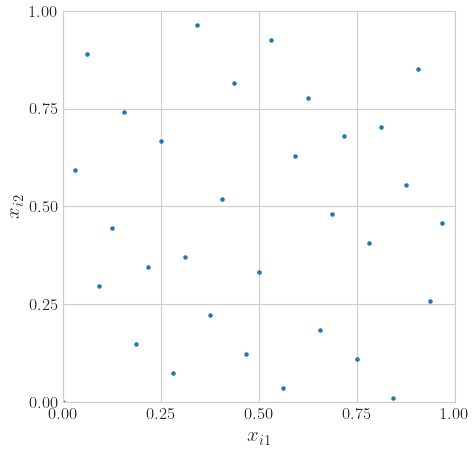

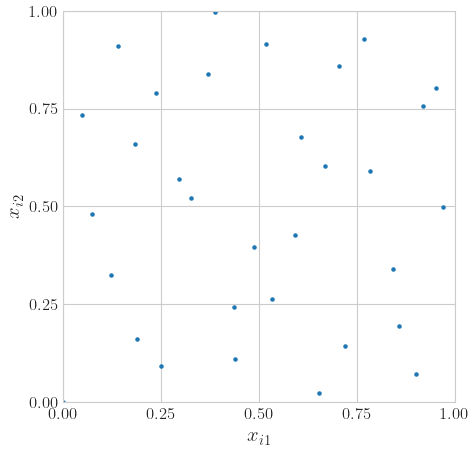

In [35]:
fig1,ax1 = qp.plot_proj(unscrambled_halton, n = 2**5)
fig2,ax2 = qp.plot_proj(scrambled_halton,n = 2**5)

### Examples of the Linear-Scrambled Halton with plots:

Here we show a 3-dimensional scrambled Halton:

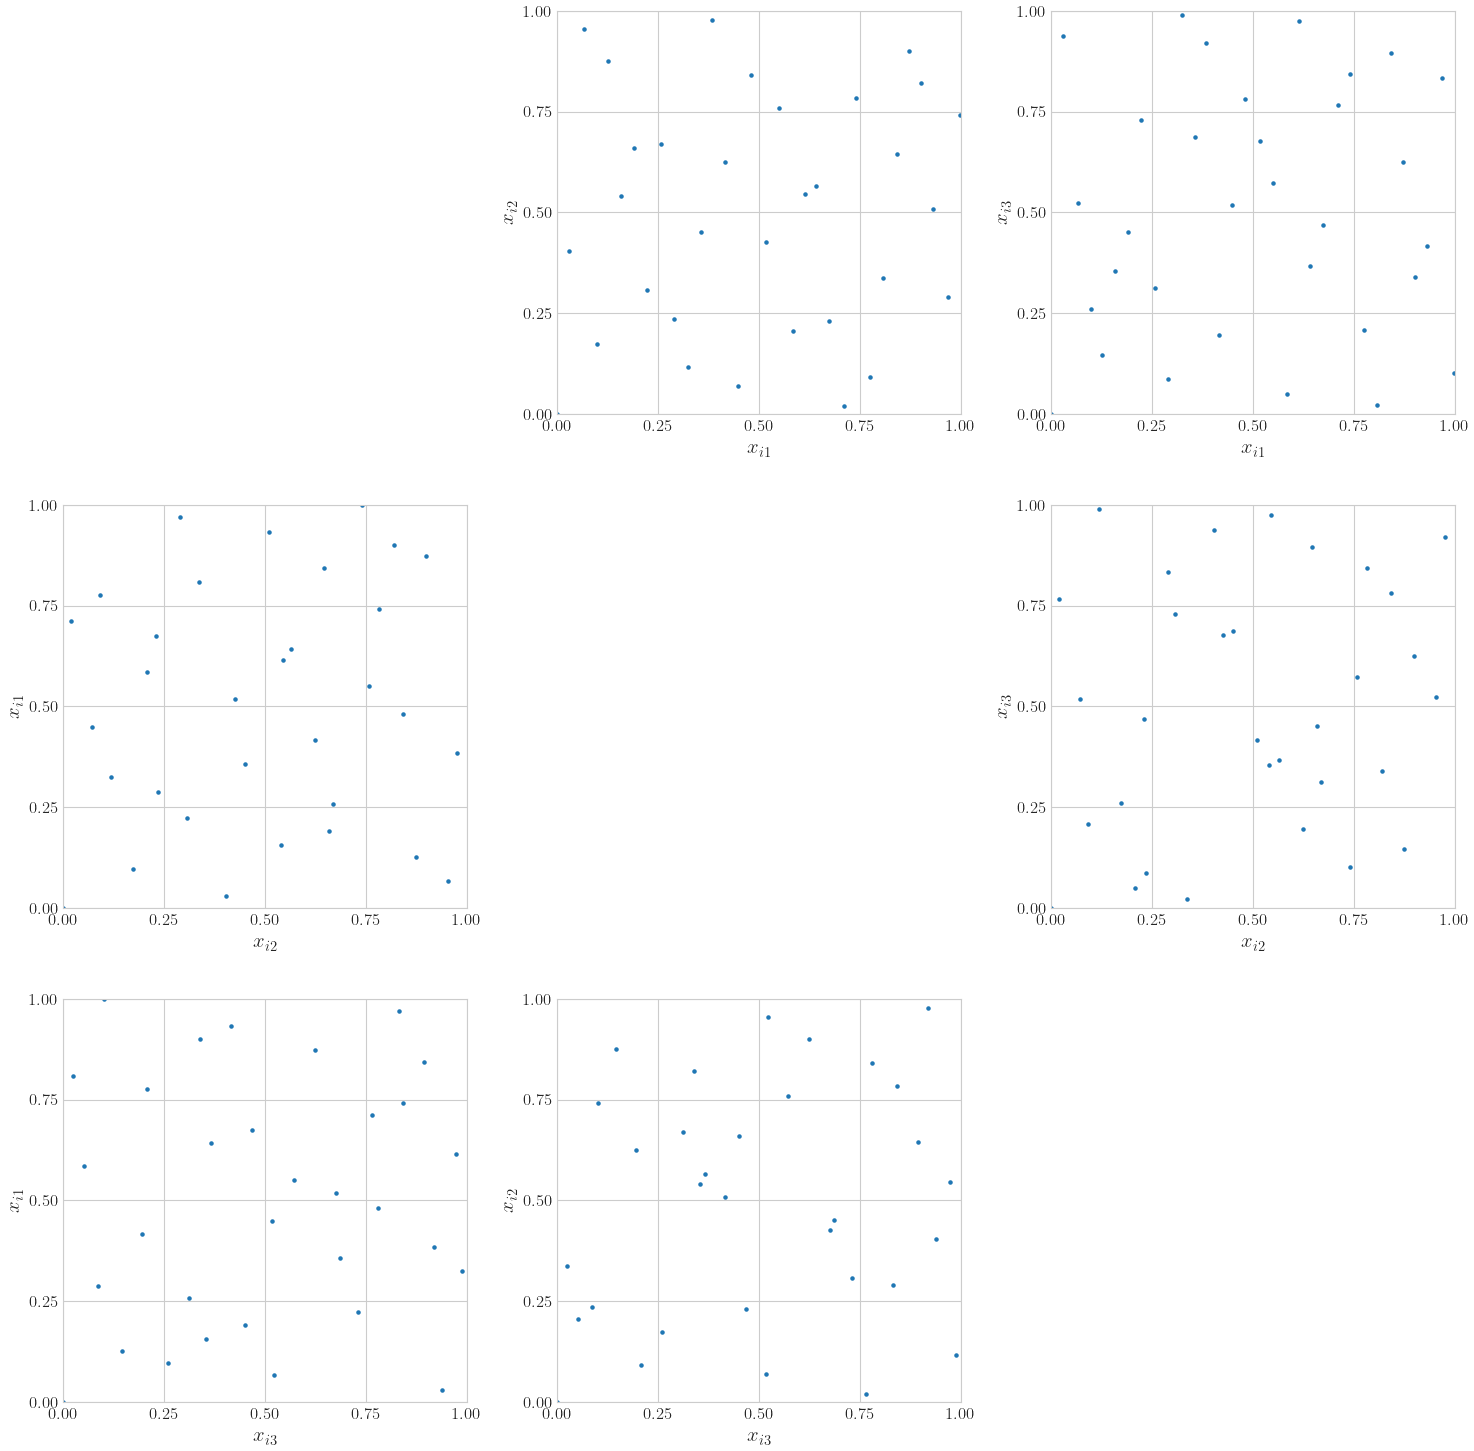

In [36]:
dimension = 3
halton = qp.Halton(dimension, randomize= 'LMS', generalize=False)
fig,ax = qp.plot_proj(halton, n = 2**5, d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False)

Here we show a 4-dimensional scrambled Halton with successively increasing number of points. The initial points are in blue.  The next additional points are in orange. The final additional points are in green.

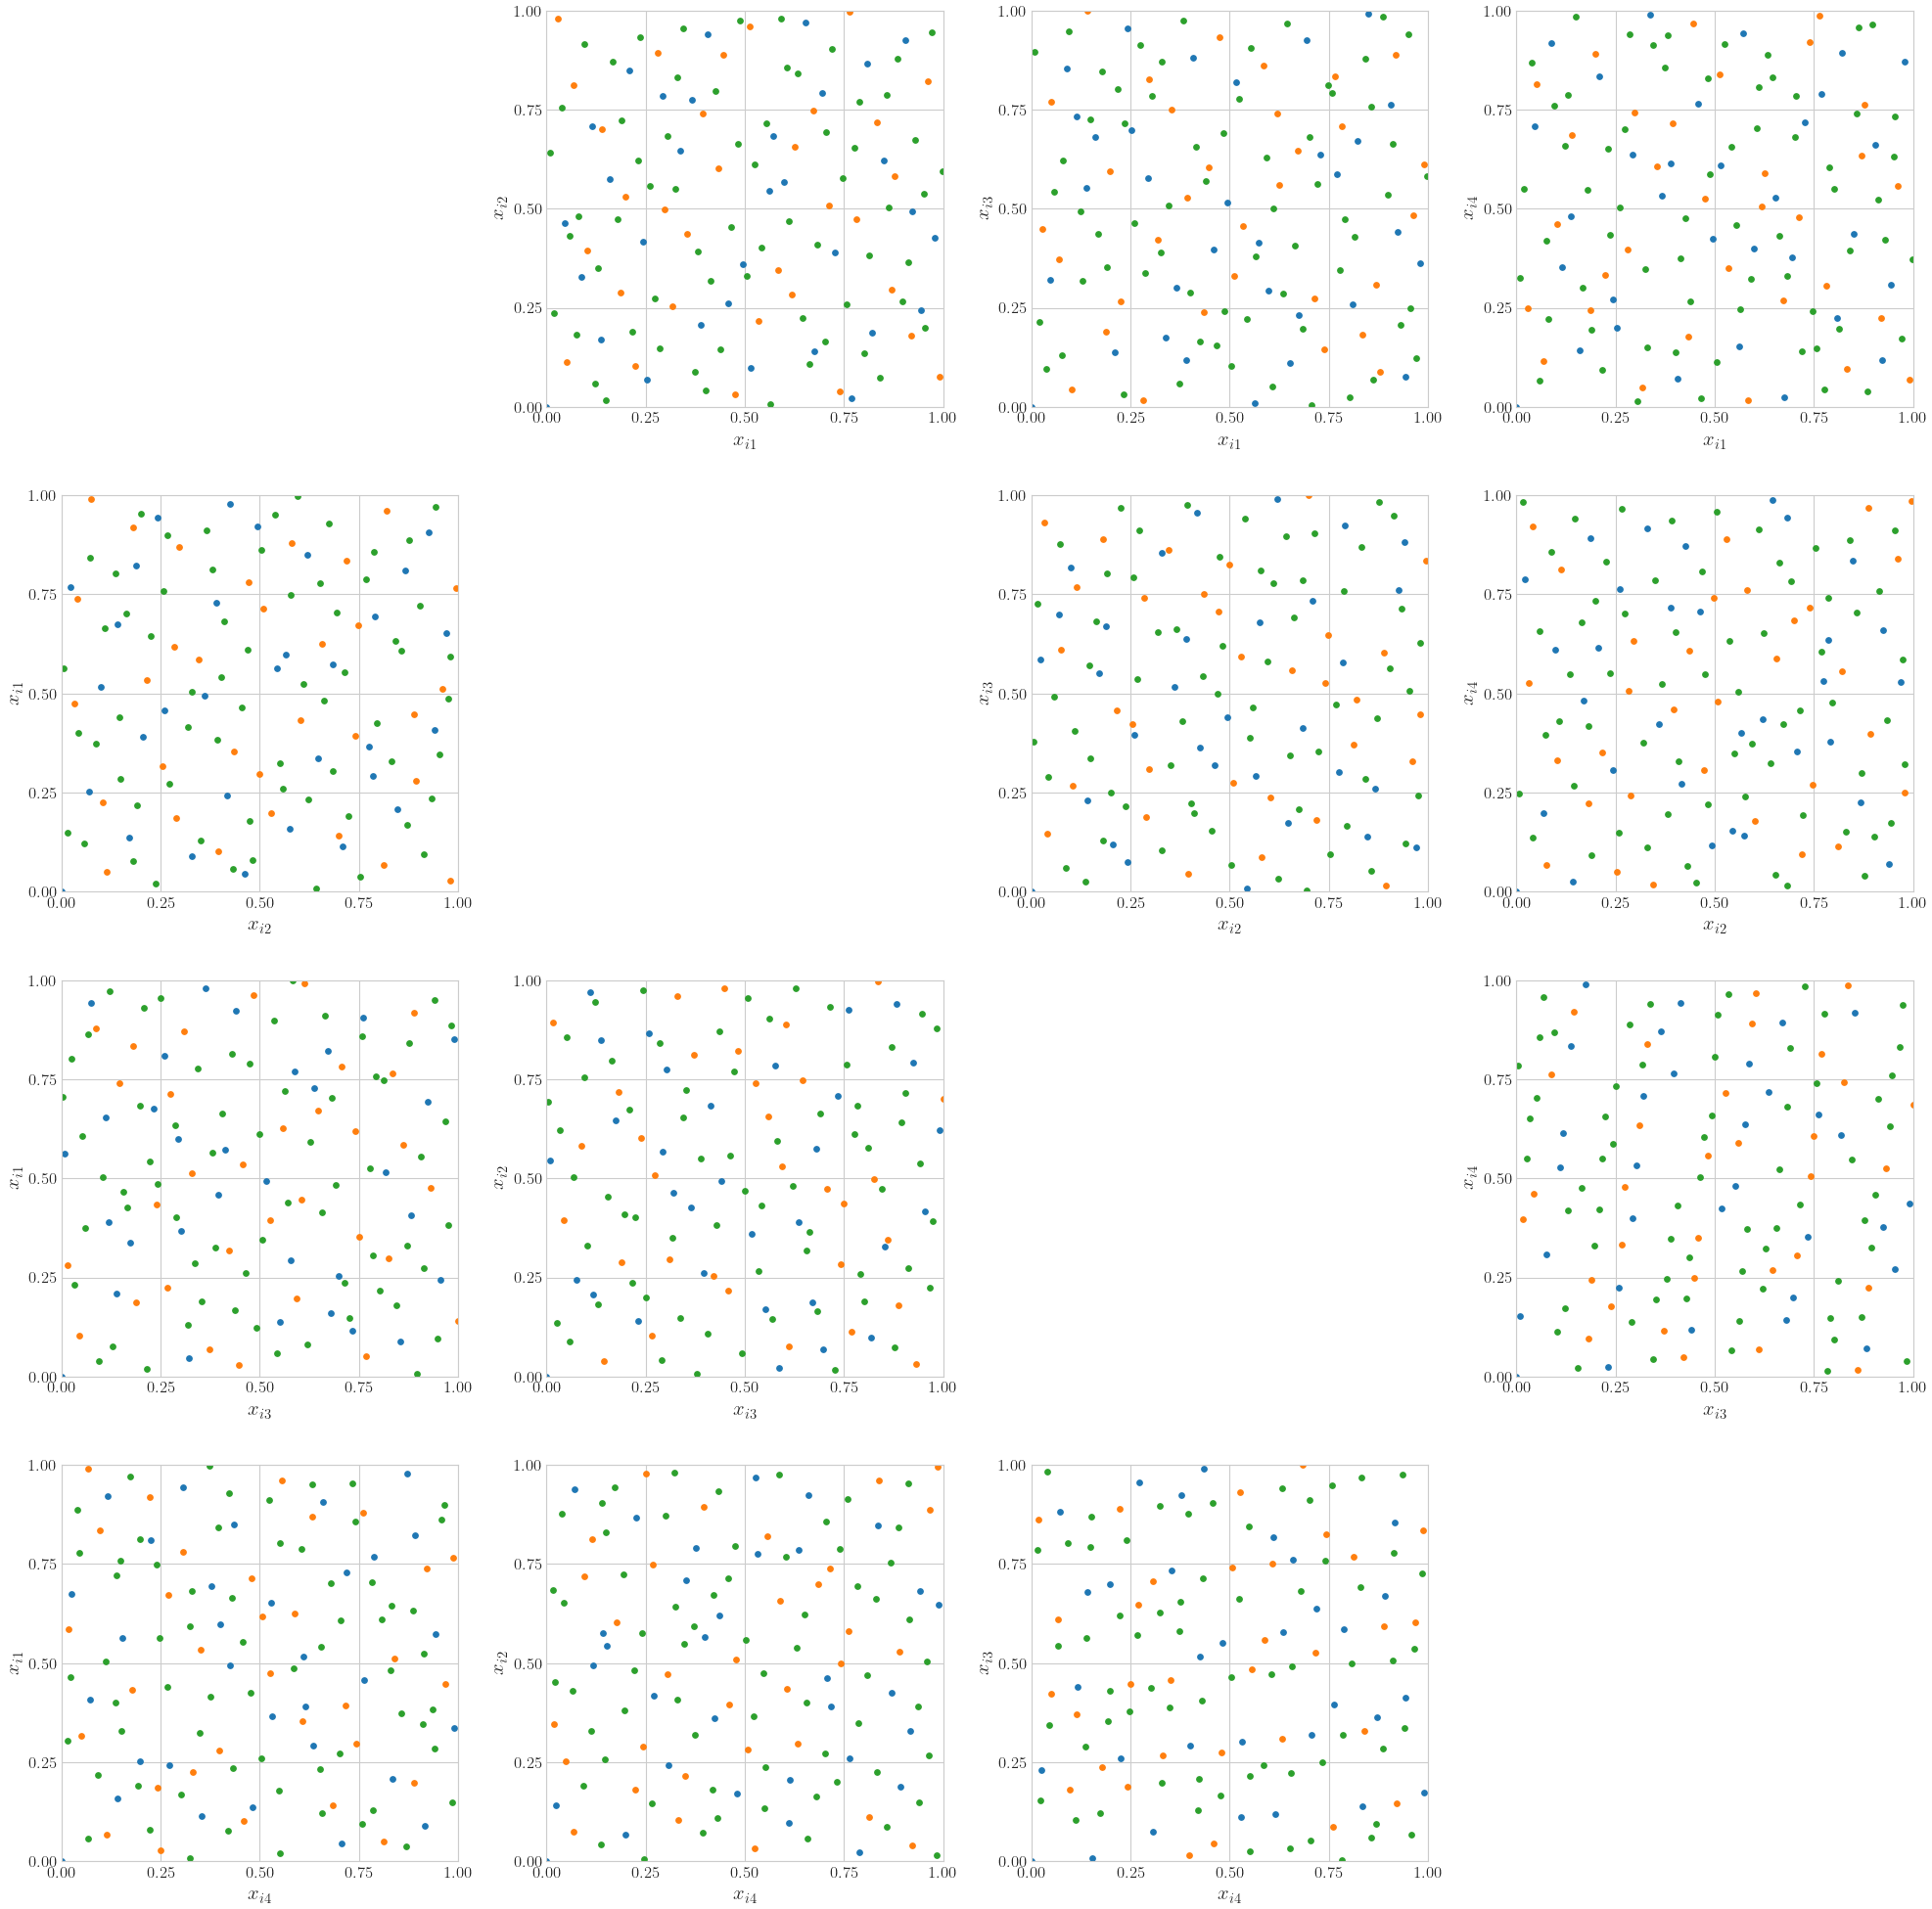

In [37]:
dimension = 4
halton = qp.Halton(dimension, randomize= 'LMS', generalize=False)
fig,ax = qp.plot_proj(halton, n = [2**5,2**6,2**7], d_horizontal = range(dimension), d_vertical = range(dimension),math_ind = False,marker_size = 15)